In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
data =  {'eng':[10,30,50,70],
         'kor':[20,40,60,80],
         'math':[90,50,20,70]}
df = pd.DataFrame(data,index=['a','b','c','d'])
df


,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


### 추가

#### 컬럼 추가
- [] 작성하여 추가

In [4]:
# 컬럼이 있으면 수정, 없으면 추가
df['my1'] = [1,2,3,4]

In [9]:
df['my2'] = df['kor'] + df['eng']

In [10]:
df

,eng,kor,math,my1,my2
a,10,20,90,1,30
b,30,40,50,2,70
c,50,60,20,3,110
d,70,80,70,4,150


#### 행추가
- loc을 사용하여 추가

In [14]:
df.loc['e'] = [1,2,3]

### 삭제

In [15]:
df.drop(index=['a','c'])

,eng,kor,math
b,30,40,50
d,1,2,3
e,1,2,3


In [16]:
df.drop(columns=['eng','kor'])

,math
a,90
b,50
c,20
d,3
e,3


### 결측 데이터 처리 (대표값, 삭제)

In [64]:
df.loc['b':'c','kor'] = np.nan

In [65]:
df.loc['c':'d','math'] = np.nan

In [24]:
df.isna()

,eng,kor,math
a,False,False,False
b,False,True,False
c,False,True,True
d,False,False,True
e,False,False,False


In [23]:
# nan값을 True로 표현
# 컬럼별 nan의 갯수를 파악할수 있음
df.isna().sum()

eng     0
kor     2
math    2
dtype: int64

!pip install missingno

In [29]:
import missingno as mg

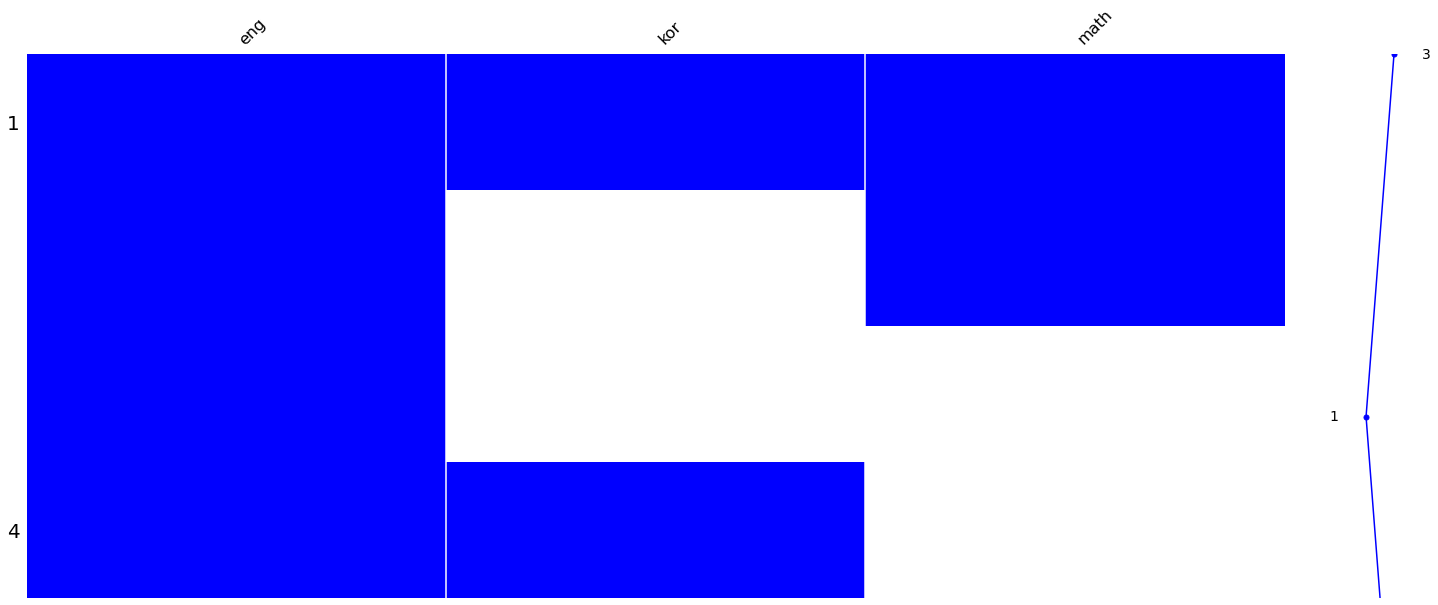

In [66]:
# 결측치 데이터가 어디에 분포되어있는지를 시각화하여 표현
mg.matrix(df, color=(0,0,1))
plt.show()

#### nan 데이터 특정값 채우기

In [33]:
# 결측치 채우기
df.fillna(1)

,eng,kor,math
a,10,20.0,90.0
b,30,1.0,50.0
c,50,1.0,1.0
d,1,2.0,1.0
e,1,2.0,3.0


In [34]:
# 특정컬럼만 수정
df['kor'] = df['kor'].fillna(3)

### nan 삭제

In [42]:
# nan값이 있는 행을 삭제 axis=0
df.dropna()

,eng,kor,math
a,10,20.0,90.0


In [43]:
# nan값이 있는 컬럼을 삭제 axis=1
df.dropna(axis=1)

,eng
a,10
b,30
c,50
d,70


In [45]:
# 해당 컬럼에 nan값이 있는 행삭제
df.dropna(subset=['kor'])

,eng,kor,math
a,10,20.0,90.0
d,70,80.0,NaN


### 정렬

In [54]:
# by = 기준컬럼 지정
df.sort_values(by='math', ascending=True)

,eng,kor,math
c,50,60,20
b,30,40,50
d,70,80,70
a,10,20,90


In [59]:
df.sort_values(by='kor', ascending=False)

,eng,kor,math
d,70,80,70
b,30,40,50
c,50,40,20
a,10,20,90


In [61]:
# kor 점수가 같은 경우 eng를 기준으로 다시 정렬하겠다
df.sort_values(by=['kor','eng'], ascending=False)

,eng,kor,math
d,70,80,70
c,50,40,20
b,30,40,50
a,10,20,90


In [62]:
df.sort_index()

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,40,20
d,70,80,70


In [55]:
df.loc['c','kor'] = 40

In [56]:
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,40,20
d,70,80,70
